In [4]:
# A/B Testing Analysis for AlphaCare Insurance Solutions

## Phase 1: Setup and Data Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import statsmodels.stats.multicomp as mc

print("Loading data for A/B Hypothesis Testing...")

print("Current working directory from within notebook:", os.getcwd())

file_path = '../data/MachineLearningRating_v3.txt'

df = None

try:
    df = pd.read_csv(file_path, delimiter='|')
    print("Data loaded successfully!")
    print(f"Shape of data: {df.shape}")

    df.columns = df.columns.str.strip()
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype(str).str.strip()
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

    df = df[(df['TotalPremium'] >= 0) & (df['TotalClaims'] >= 0)].copy()
    print("Filtered out rows with negative TotalPremium or TotalClaims.")

    df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
    df['LossRatio'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(subset=['LossRatio'], inplace=True)
    print("Calculated LossRatio and handled NaN/inf values.")

    print("\nCleaned Data Info:")
    df.info()

except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please check the path.")
    print("Ensure 'MachineLearningRating_v3.txt' is in your 'data' folder.")
except Exception as e:
    print(f"An unexpected error occurred while loading or preprocessing the data: {e}")

if df is None:
    print("\nData loading failed. Please resolve the error before proceeding with analysis.")

Loading data for A/B Hypothesis Testing...
Current working directory from within notebook: /home/y/AlphaCare-Insurance-Solutions/notebooks


/tmp/ipykernel_14256/2142038780.py:22: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|')


Data loaded successfully!
Shape of data: (1000098, 52)
Filtered out rows with negative TotalPremium or TotalClaims.


/tmp/ipykernel_14256/2142038780.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LossRatio'].replace([np.inf, -np.inf], np.nan, inplace=True)


Calculated LossRatio and handled NaN/inf values.

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 618174 entries, 0 to 1000097
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   UnderwrittenCoverID       618174 non-null  int64         
 1   PolicyID                  618174 non-null  int64         
 2   TransactionMonth          618174 non-null  datetime64[ns]
 3   IsVATRegistered           618174 non-null  bool          
 4   Citizenship               618174 non-null  object        
 5   LegalType                 618174 non-null  object        
 6   Title                     618174 non-null  object        
 7   Language                  618174 non-null  object        
 8   Bank                      618174 non-null  object        
 9   AccountType               618174 non-null  object        
 10  MaritalStatus             618174 non-null  object        
 11  


--- Hypothesis 1: Gender vs. Mean Loss Ratio ---
Gender Value Counts:
Gender
Not specified    591066
Male              19083
nan                4621
Female             3404
Name: count, dtype: int64
Mean Loss Ratio for Female: 0.4920
Mean Loss Ratio for Male: 0.3533
Number of Female samples: 3404
Number of Male samples: 19083


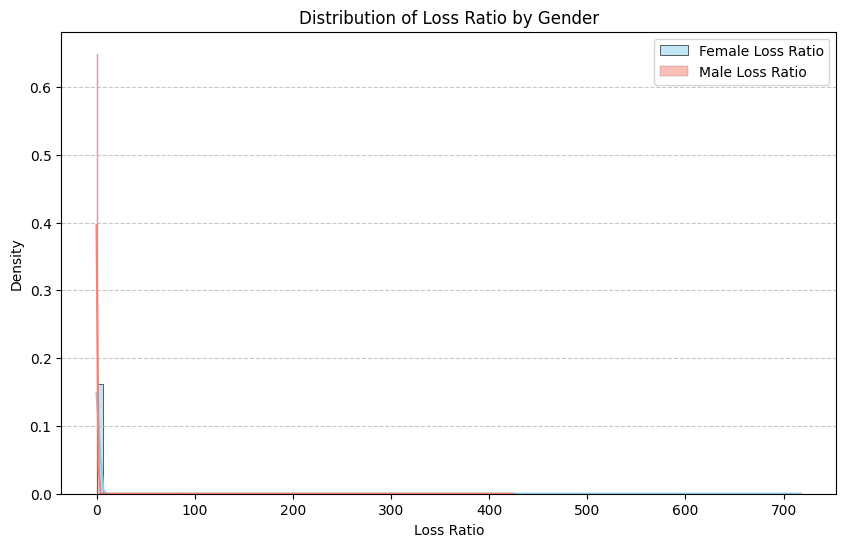

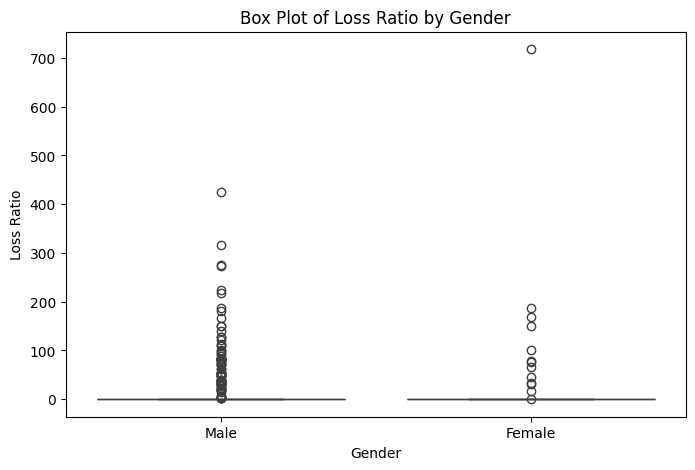

In [5]:
print("\n--- Hypothesis 1: Gender vs. Mean Loss Ratio ---")

gender_counts = df['Gender'].value_counts()
print(f"Gender Value Counts:\n{gender_counts}")

df_h1 = df[df['Gender'].isin(['Male', 'Female'])].copy()

female_lr = df_h1[df_h1['Gender'] == 'Female']['LossRatio']
male_lr = df_h1[df_h1['Gender'] == 'Male']['LossRatio']

print(f"Mean Loss Ratio for Female: {female_lr.mean():.4f}")
print(f"Mean Loss Ratio for Male: {male_lr.mean():.4f}")
print(f"Number of Female samples: {len(female_lr)}")
print(f"Number of Male samples: {len(male_lr)}")

plt.figure(figsize=(10, 6))
sns.histplot(female_lr, color="skyblue", label="Female Loss Ratio", kde=True, stat="density", common_norm=False, alpha=0.5)
sns.histplot(male_lr, color="salmon", label="Male Loss Ratio", kde=True, stat="density", common_norm=False, alpha=0.5)
plt.title('Distribution of Loss Ratio by Gender')
plt.xlabel('Loss Ratio')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='LossRatio', data=df_h1)
plt.title('Box Plot of Loss Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Loss Ratio')
plt.show()

In [6]:
# Perform Independent Samples T-test
# H0: Mean Loss Ratio (Female) = Mean Loss Ratio (Male)
# H1: Mean Loss Ratio (Female) != Mean Loss Ratio (Male)

if not female_lr.empty and not male_lr.empty:
    t_stat, p_value = stats.ttest_ind(female_lr, male_lr, equal_var=False)

    print(f"\nResults for Hypothesis 1 (Gender vs. Mean Loss Ratio):")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")

    # Set significance level (alpha)
    alpha = 0.05

    if p_value < alpha:
        print(f"  Conclusion: Reject H0. There is a statistically significant difference in mean loss ratio between female and male policyholders (p < {alpha}).")
    else:
        print(f"  Conclusion: Fail to reject H0. There is no statistically significant difference in mean loss ratio between female and male policyholders (p >= {alpha}).")
else:
    print("\nCannot perform T-test for Hypothesis 1: One or both gender groups are empty after filtering.")


Results for Hypothesis 1 (Gender vs. Mean Loss Ratio):
  T-statistic: 0.5798
  P-value: 0.5621
  Conclusion: Fail to reject H0. There is no statistically significant difference in mean loss ratio between female and male policyholders (p >= 0.05).



--- Hypothesis 2: Province vs. Mean Total Claims ---
Top 5 Provinces by policy count: ['Gauteng', 'KwaZulu-Natal', 'Western Cape', 'North West', 'Mpumalanga']

Mean Total Claims by Province:
  Gauteng: 116.26
  KwaZulu-Natal: 120.88
  Western Cape: 105.91
  North West: 62.29
  Mpumalanga: 64.30


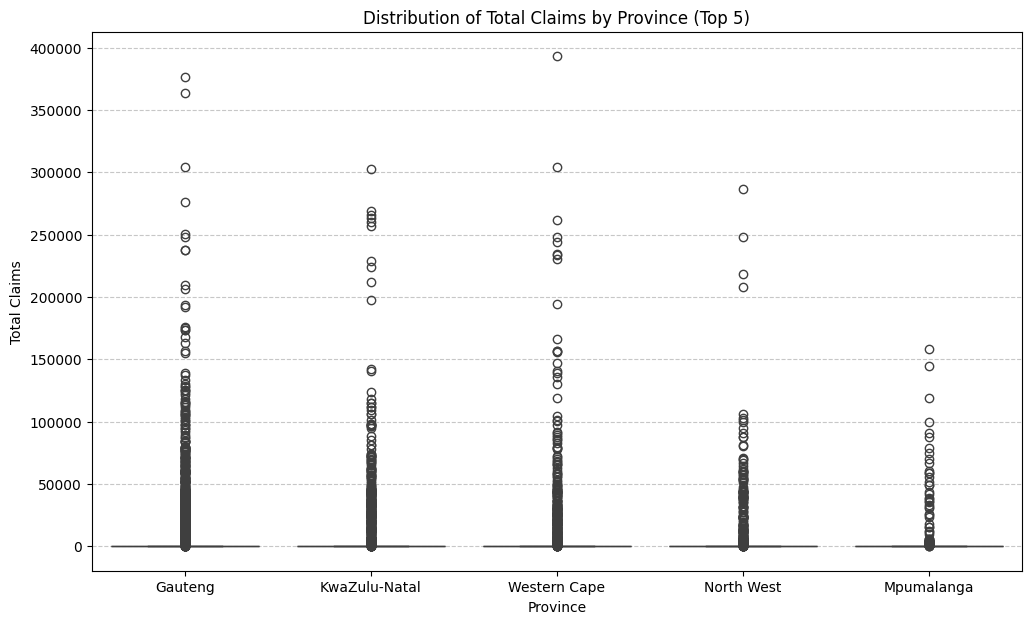

In [7]:
# --- Hypothesis 2: Province vs. Mean Total Claims ---
print("\n--- Hypothesis 2: Province vs. Mean Total Claims ---")

top_provinces = df['Province'].value_counts().nlargest(5).index.tolist()
print(f"Top 5 Provinces by policy count: {top_provinces}")

# Filter the DataFrame to include only these top provinces
df_h2 = df[df['Province'].isin(top_provinces)].copy()

# Prepare data for ANOVA: a list of TotalClaims for each province
data_for_anova = [df_h2[df_h2['Province'] == province]['TotalClaims'].dropna() for province in top_provinces]

print("\nMean Total Claims by Province:")
for i, province in enumerate(top_provinces):
    if not data_for_anova[i].empty:
        print(f"  {province}: {data_for_anova[i].mean():.2f}")
    else:
        print(f"  {province}: No data or all NaN for TotalClaims")


# Visualize the distribution of TotalClaims by Province 
plt.figure(figsize=(12, 7))
sns.boxplot(x='Province', y='TotalClaims', data=df_h2, order=top_provinces)
plt.title('Distribution of Total Claims by Province (Top 5)')
plt.xlabel('Province')
plt.ylabel('Total Claims')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
# Perform ANOVA test
# H0: Mean Total Claims are equal across all selected provinces
# H1: At least one province's Mean Total Claims is significantly different

# Filter out empty arrays before passing to f_oneway, as it requires at least two non-empty groups
data_for_anova_clean = [arr for arr in data_for_anova if not arr.empty]

if len(data_for_anova_clean) >= 2:
    f_stat, p_value = stats.f_oneway(*data_for_anova_clean)

    print(f"\nResults for Hypothesis 2 (Province vs. Mean Total Claims - ANOVA):")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")

    alpha = 0.05

    if p_value < alpha:
        print(f"  Conclusion: Reject H0. There is a statistically significant difference in mean total claims among the selected provinces (p < {alpha}).")
        print("  (If significant, a post-hoc test like Tukey's HSD would be needed to find which specific provinces differ.)")
    else:
        print(f"  Conclusion: Fail to reject H0. There is no statistically significant difference in mean total claims among the selected provinces (p >= {alpha}).")
else:
    print("\nCannot perform ANOVA for Hypothesis 2: Not enough non-empty province groups to compare.")


Results for Hypothesis 2 (Province vs. Mean Total Claims - ANOVA):
  F-statistic: 7.4436
  P-value: 0.0000
  Conclusion: Reject H0. There is a statistically significant difference in mean total claims among the selected provinces (p < 0.05).
  (If significant, a post-hoc test like Tukey's HSD would be needed to find which specific provinces differ.)



--- Post-hoc Test (Tukey's HSD) for Province vs. Mean Total Claims ---
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2    meandiff p-adj    lower    upper   reject
---------------------------------------------------------------------
      Gauteng KwaZulu-Natal   4.6229 0.9935  -25.3468  34.5927  False
      Gauteng    Mpumalanga -51.9647 0.0342 -101.4828  -2.4465   True
      Gauteng    North West -53.9687 0.0001  -86.3582 -21.5792   True
      Gauteng  Western Cape  -10.346 0.8988  -41.8758  21.1839  False
KwaZulu-Natal    Mpumalanga -56.5876 0.0282  -109.316  -3.8592   True
KwaZulu-Natal    North West -58.5917 0.0002  -95.7039 -21.4794   True
KwaZulu-Natal  Western Cape -14.9689 0.7945  -51.3333  21.3955  False
   Mpumalanga    North West   -2.004    1.0  -56.1444  52.1364  False
   Mpumalanga  Western Cape  41.6187 0.2128  -12.0118  95.2492  False
   North West  Western Cape  43.6227 0.0166    5.2396  82.0059   True
------------------

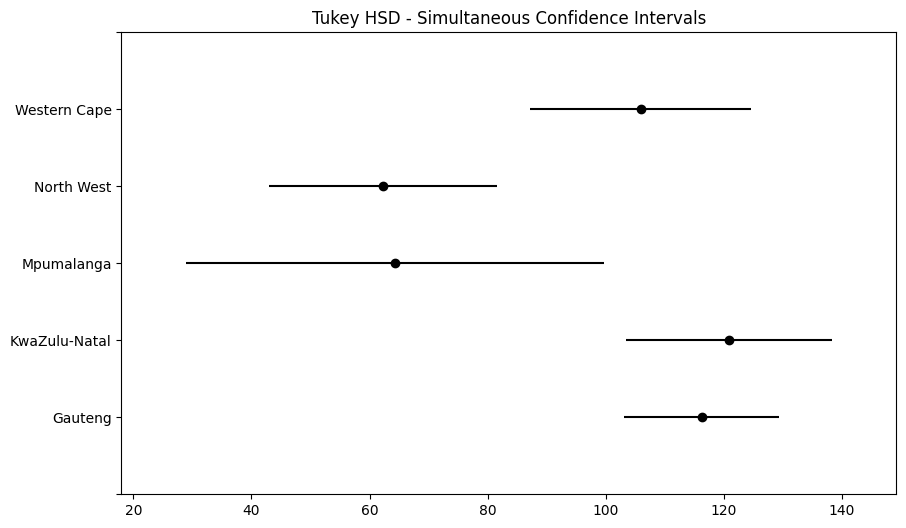

In [9]:
# --- Post-hoc Test for Hypothesis 2 (Tukey's HSD) ---
print("\n--- Post-hoc Test (Tukey's HSD) for Province vs. Mean Total Claims ---")

import statsmodels.stats.multicomp as mc

df_for_tukey = df[['TotalClaims', 'Province']].copy()
df_for_tukey = df_for_tukey[df_for_tukey['Province'].isin(top_provinces)].dropna()

# Perform Tukey's HSD test
# endog = dependent variable (TotalClaims)
# groups = independent variable (Province)
tukey_result = mc.pairwise_tukeyhsd(endog=df_for_tukey['TotalClaims'],
                                    groups=df_for_tukey['Province'],
                                    alpha=0.05)

print(tukey_result.summary())

# You can also visualize the results
tukey_result.plot_simultaneous()
plt.title('Tukey HSD - Simultaneous Confidence Intervals')
plt.show()


--- Hypothesis 3: Vehicle Type vs. Claim Incidence ---
Claim Incidence Counts:
HasClaim
0    615533
1      2641
Name: count, dtype: int64
Percentage of policies with claims: 0.43%

VehicleType Value Counts:
VehicleType
Passenger Vehicle    577200
Medium Commercial     33428
Heavy Commercial       4264
Light Commercial       2614
Bus                     450
nan                     218
Name: count, dtype: int64

Vehicle types included in Chi-squared test (more than 100 policies): ['Passenger Vehicle', 'Medium Commercial', 'Heavy Commercial', 'Light Commercial', 'Bus', 'nan']

Contingency Table (VehicleType vs. HasClaim):
HasClaim                0     1
VehicleType                    
Bus                   450     0
Heavy Commercial     4245    19
Light Commercial     2606     8
Medium Commercial   33277   151
Passenger Vehicle  574750  2450
nan                   205    13


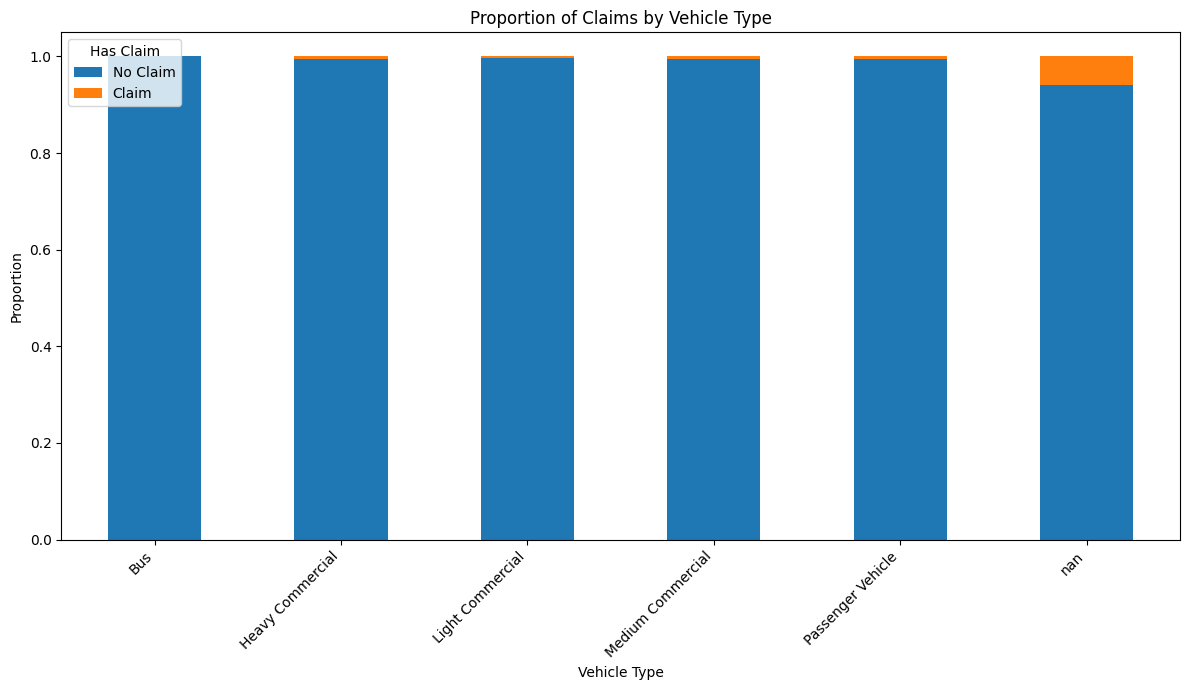

In [10]:
# --- Hypothesis 3: Vehicle Type vs. Claim Incidence ---
print("\n--- Hypothesis 3: Vehicle Type vs. Claim Incidence ---")

# Create the 'HasClaim' binary variable
# If TotalClaims > 0, HasClaim = 1 (True), otherwise 0 (False)
df['HasClaim'] = (df['TotalClaims'] > 0).astype(int)

print(f"Claim Incidence Counts:\n{df['HasClaim'].value_counts()}")
print(f"Percentage of policies with claims: {df['HasClaim'].mean() * 100:.2f}%")

vehicle_type_counts = df['VehicleType'].value_counts()
print(f"\nVehicleType Value Counts:\n{vehicle_type_counts}")

min_vehicles_per_type = 100 # Example threshold
common_vehicle_types = vehicle_type_counts[vehicle_type_counts > min_vehicles_per_type].index.tolist()
print(f"\nVehicle types included in Chi-squared test (more than {min_vehicles_per_type} policies): {common_vehicle_types}")

df_h3 = df[df['VehicleType'].isin(common_vehicle_types)].copy()

contingency_table = pd.crosstab(df_h3['VehicleType'], df_h3['HasClaim'])
print("\nContingency Table (VehicleType vs. HasClaim):")
print(contingency_table)

contingency_table_prop = contingency_table.div(contingency_table.sum(1).astype(float), axis=0)
contingency_table_prop.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Proportion of Claims by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Has Claim', labels=['No Claim', 'Claim'])
plt.tight_layout()
plt.show()

In [11]:
# Perform Chi-squared Test of Independence
# H0: VehicleType is independent of HasClaim
# H1: VehicleType is not independent of HasClaim (there is an association)

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nResults for Hypothesis 3 (VehicleType vs. Claim Incidence - Chi-squared Test):")
print(f"  Chi-squared statistic: {chi2:.4f}")
print(f"  P-value: {p_value:.4f}")
print(f"  Degrees of Freedom: {dof}")

alpha = 0.05

if p_value < alpha:
    print(f"  Conclusion: Reject H0. There is a statistically significant association between VehicleType and Claim Incidence (p < {alpha}).")
else:
    print(f"  Conclusion: Fail to reject H0. There is no statistically significant association between VehicleType and Claim Incidence (p >= {alpha}).")


Results for Hypothesis 3 (VehicleType vs. Claim Incidence - Chi-squared Test):
  Chi-squared statistic: 160.5007
  P-value: 0.0000
  Degrees of Freedom: 5
  Conclusion: Reject H0. There is a statistically significant association between VehicleType and Claim Incidence (p < 0.05).
